In [1]:
# libraries
import pandas as pd
import requests
import numpy as np 
import random 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

from sklearn.cluster import KMeans

# install Folium
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium 

# intall geopy
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be 

In [2]:
# Load Longitude and latitude file
df_latlon = pd.read_csv("https://raw.githubusercontent.com/GuillemCC/github_Guillem/master/Barcelona%20latlon.csv", sep = ';', encoding = "ISO-8859-1")
df_latlon.head()

,DISTRICT,NEIGHBORHOOD,LATITUDE,LONGITUDE
0,Ciutat Vella,el Raval,"41,379364","2,16957"
1,Ciutat Vella,el Barri Gotic,"41,382478","2,176178"
2,Ciutat Vella,la Barceloneta,"41,379428","2,189968"
3,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera","41,38614","2,183532"
4,Eixample,el Fort Pienc,"41,397656","2,182126"


In [3]:
# Change latitude and lingitude to Floats
df_latlon['LATITUDE'] = df_latlon['LATITUDE'].str.replace(",", ".").astype(float)
df_latlon['LONGITUDE'] = df_latlon['LONGITUDE'].str.replace(",", ".").astype(float)
df_latlon.dtypes

DISTRICT         object
NEIGHBORHOOD     object
LATITUDE        float64
LONGITUDE       float64
dtype: object

In [4]:
# Load population densiy file
df_density = pd.read_csv("https://raw.githubusercontent.com/GuillemCC/github_Guillem/master/Barcelona-density-by-neighborhood.csv", sep = ';', encoding = "ISO-8859-1")

# delete irrelevant columns dor the model
df_density.drop(columns = ['AREA', 'DENSITY'], inplace=True)
df_density.head()

,NEIGHBORHOOD,POPULATION,RESIDENCIAL_AREA,NET_DENSITY
0,el Raval,47608,49.7,958.8
1,el Barri Gotic,16062,34.1,470.6
2,la Barceloneta,14996,13.5,1107.4
3,"Sant Pere, Santa Caterina i la Ribera",22721,32.5,700.1
4,el Fort Pienc,32016,33.4,958.6


In [5]:
# Check dataframe column types
df_density.dtypes

NEIGHBORHOOD         object
POPULATION            int64
RESIDENCIAL_AREA    float64
NET_DENSITY         float64
dtype: object

In [6]:
# Load population age file
df_age = pd.read_csv("https://raw.githubusercontent.com/GuillemCC/github_Guillem/master/Barcelona-population-years-old.csv", sep = ';', encoding = "ISO-8859-1")
df_age.head()

,NEIGHBORHOOD,0-14 years,15-24 years,25- 64 years,65 years and more
0,el Raval,6146,4867,30926,5669
1,el Barri Gotic,1354,1532,10966,2210
2,la Barceloneta,1268,1285,9672,2771
3,"Sant Pere, Santa Caterina i la Ribera",2221,2065,15175,3260
4,el Fort Pienc,3703,2781,18727,6805


In [7]:
# Check dataframe column types
df_age.dtypes

NEIGHBORHOOD         object
0-14 years            int64
15-24 years           int64
25- 64 years          int64
65 years and more     int64
dtype: object

In [8]:
# Join three dataframes in one by NEIGHBORHOOD
df_density_age = df_density.join(df_age.set_index('NEIGHBORHOOD'), on='NEIGHBORHOOD')
df_latlon_density_age = df_density_age.join(df_latlon.set_index('NEIGHBORHOOD'), on='NEIGHBORHOOD')
df_latlon_density_age

,NEIGHBORHOOD,POPULATION,RESIDENCIAL_AREA,NET_DENSITY,0-14 years,15-24 years,25- 64 years,65 years and more,DISTRICT,LATITUDE,LONGITUDE
0,el Raval,47608,49.7,958.8,6146,4867,30926,5669,Ciutat Vella,41.379364,2.169570
1,el Barri Gotic,16062,34.1,470.6,1354,1532,10966,2210,Ciutat Vella,41.382478,2.176178
2,la Barceloneta,14996,13.5,1107.4,1268,1285,9672,2771,Ciutat Vella,41.379428,2.189968
3,"Sant Pere, Santa Caterina i la Ribera",22721,32.5,700.1,2221,2065,15175,3260,Ciutat Vella,41.386140,2.183532
4,el Fort Pienc,32016,33.4,958.6,3703,2781,18727,6805,Eixample,41.397656,2.182126
5,la Sagrada Familia,51539,51.2,1006.2,5396,4331,30249,11563,Eixample,41.405244,2.176493
6,la Dreta de l'Eixample,44052,113.9,386.8,5341,3930,25407,9374,Eixample,41.393353,2.168599
7,l'Antiga Esquerra de l'Eixample,42284,67.0,631.0,4628,3638,24912,9106,Eixample,41.389745,2.155230
8,la Nova Esquerra de l'Eixample,58180,65.3,891.0,6183,4868,33736,13393,Eixample,41.383503,2.148826
9,Sant Antoni,38345,41.3,927.6,3983,3131,22560,8671,Eixample,41.377763,2.159735


In [9]:
# Normalize all numeric fields to give the same strenght in the model
cols_to_norm = ['POPULATION', 'RESIDENCIAL_AREA', 'NET_DENSITY', '0-14 years', '15-24 years', '25- 64 years', '65 years and more']
df_density_age_grouped = df_density_age.copy()
df_density_age_grouped[cols_to_norm] = df_density_age[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_density_age_grouped

,NEIGHBORHOOD,POPULATION,RESIDENCIAL_AREA,NET_DENSITY,0-14 years,15-24 years,25- 64 years,65 years and more
0,el Raval,0.816363,0.416364,0.635753,0.792648,0.908131,0.915762,0.419292
1,el Barri Gotic,0.268404,0.274545,0.300864,0.165751,0.279004,0.317405,0.159236
2,la Barceloneta,0.249887,0.087273,0.737687,0.154500,0.232409,0.278614,0.201413
3,"Sant Pere, Santa Caterina i la Ribera",0.384072,0.260000,0.458293,0.279173,0.379551,0.443582,0.238178
4,el Fort Pienc,0.545527,0.268182,0.635615,0.473051,0.514620,0.550063,0.504699
5,la Sagrada Familia,0.884645,0.430000,0.668267,0.694532,0.807018,0.895467,0.862416
6,la Dreta de l'Eixample,0.754594,1.000000,0.243380,0.687336,0.731371,0.750315,0.697842
7,l'Antiga Esquerra de l'Eixample,0.723884,0.573636,0.410893,0.594061,0.676287,0.735476,0.677693
8,la Nova Esquerra de l'Eixample,1.000000,0.558182,0.589244,0.797488,0.908319,1.000000,1.000000
9,Sant Antoni,0.655463,0.340000,0.614350,0.509681,0.580645,0.664968,0.644989


In [10]:
# Get Barcelona location
address = 'Barcelona'
geolocator = Nominatim(user_agent="barcelona_explorer")
location = geolocator.geocode(address)

# Paint map
map_barcelona = folium.Map(location=[location.latitude, location.longitude], zoom_start=12)

# Add Neighborhood markers to map
for lat, lng, district, neighborhood in zip(df_latlon_density_age['LATITUDE'], df_latlon_density_age['LONGITUDE'], df_latlon_density_age['DISTRICT'], df_latlon_density_age['NEIGHBORHOOD']):
    label = '{}, {}'.format(neighborhood, district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3286cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_barcelona)
    
map_barcelona


In [11]:
# @hidden cell
CLIENT_ID = 'OBBPSPRMQA40DOLVKLGVKOPZ304P1FPAZM1V2KB25AQRXUHE' # your Foursquare ID
CLIENT_SECRET = 'GKR2VVLK0C2VJ4CUCMLJ042CJPHB2O3WQFE3ZIZPI13WIFAF' # your Foursquare Secret
VERSION = '20190909' # Foursquare API version

In [12]:
# Using FOURSWUARE API, request every venue for each neighborhood
# Radius = 600 --> Max residental_area = 114 ha = 1.140.000 m2 = 1,14 km2.

def getNearbyVenues(names, latitudes, longitudes, radius=600):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, 200)   
        results = requests.get(url).json()["response"]['groups'][0]['items']
        venues_list.append([(name, lat, lng, v['venue']['name'], v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['NEIGHTBORHOOD', 'LATITUDE', 'LONGITUDE', 'Venue', 'Venue Category']
    
    return(nearby_venues)

barcelona_venues = getNearbyVenues(names=df_latlon_density_age['NEIGHBORHOOD'], latitudes=df_latlon_density_age['LATITUDE'], longitudes=df_latlon_density_age['LONGITUDE'])

# We change Neighborhood field name becasuse there is a venue called Neighborhood too, which conflicts with this field.
barcelona_venues.rename(columns={"NEIGHTBORHOOD": "Neighborhood_main_field"}, inplace = True)

barcelona_venues.head()

,Neighborhood_main_field,LATITUDE,LONGITUDE,Venue,Venue Category
0,el Raval,41.379364,2.16957,Filmoteca de Catalunya,Movie Theater
1,el Raval,41.379364,2.16957,A Tu Bola,Tapas Restaurant
2,el Raval,41.379364,2.16957,La Monroe,Spanish Restaurant
3,el Raval,41.379364,2.16957,La Robadora,Gastropub
4,el Raval,41.379364,2.16957,Ølgod,Beer Bar


In [13]:
# Show the in how many neighborhoods appear each venue category
df = barcelona_venues.groupby('Venue Category')['Neighborhood_main_field'].nunique()
pd.set_option('display.max_rows', 500)
df.reset_index().rename(columns={'Neighborhood_main_field':'Count'}).sort_values('Count',ascending=False).reset_index()

,index,Venue Category,Count
0,252,Spanish Restaurant,60
1,228,Restaurant,57
2,265,Tapas Restaurant,54
3,216,Plaza,52
4,49,Café,51
5,173,Mediterranean Restaurant,49
6,202,Park,49
7,212,Pizza Place,45
8,19,Bakery,45
9,260,Supermarket,43


In [14]:
# Create a dataframe with the number of apperances of each venue category
barcelona_onehot = pd.get_dummies(barcelona_venues[['Venue Category']], prefix="", prefix_sep="")

# Move Neighborhood_main_field column to the first one
barcelona_onehot['Neighborhood_main_field'] = barcelona_venues['Neighborhood_main_field'] 
fixed_columns = [barcelona_onehot.columns[-1]] + list(barcelona_onehot.columns[:-1])
barcelona_onehot = barcelona_onehot[fixed_columns]

# I create two groped Dataframes
# This one will be used to get most commun venues
barcelona_grouped = barcelona_onehot.groupby('Neighborhood_main_field').mean().reset_index()

# This one will to get k-means from every value
barcelona_onehot_plus_DensityAge_grouped = barcelona_grouped.join(df_density_age_grouped.set_index('NEIGHBORHOOD'), on='Neighborhood_main_field')
barcelona_onehot_plus_DensityAge_grouped

,Neighborhood_main_field,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Wings Joint,Women's Store,Yoga Studio,POPULATION,RESIDENCIAL_AREA,NET_DENSITY,0-14 years,15-24 years,25- 64 years,65 years and more
0,Baro de Viver,0.000000,0.000000,0.050000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.033507,0.000000,0.423309,0.045395,0.044897,0.030907,0.023532
1,Can Baro,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.145631,0.094545,0.408286,0.128336,0.134880,0.141166,0.148786
2,Can Peguera,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.028852,0.020000,0.235217,0.027865,0.033767,0.025301,0.031952
3,Canyelles,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.108494,0.065455,0.402044,0.090790,0.099604,0.098927,0.129614
4,Ciutat Meridiana,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.169046,0.101818,0.446495,0.209969,0.214865,0.155975,0.134200
5,Diagonal Mar i el Front Maritim del Poblenou,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.012346,0.000000,0.226142,0.173636,0.384072,0.338566,0.166195,0.228161,0.145779
6,Horta,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.453448,0.540909,0.267183,0.422030,0.419166,0.418880,0.502519
7,Hostafrancs,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.265659,0.168182,0.465290,0.222135,0.238068,0.280712,0.223291
8,Montbau,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.078027,0.068182,0.285430,0.063448,0.067912,0.065292,0.110443
9,Navas,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.015625,0.000000,...,0.000000,0.000000,0.000000,0.373788,0.169091,0.652764,0.330194,0.354839,0.356496,0.392602


In [15]:
# This function returns venoes sorted
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

# Create columns for TOP10 venues
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
columns = ['NEIGHBORHOOD']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a dataframe with the most common venues for every Neighborhood
bar_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
bar_neighborhoods_venues_sorted['NEIGHBORHOOD'] = barcelona_grouped['Neighborhood_main_field']
for ind in np.arange(barcelona_grouped.shape[0]):
    bar_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(barcelona_grouped.iloc[ind, :], num_top_venues)

bar_neighborhoods_venues_sorted

,NEIGHBORHOOD,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baro de Viver,Clothing Store,Food,Dessert Shop,Furniture / Home Store,Supermarket,Toy / Game Store,Restaurant,Metro Station,Park,Bookstore
1,Can Baro,Spanish Restaurant,Plaza,Tapas Restaurant,Chinese Restaurant,Bar,Restaurant,Grocery Store,Breakfast Spot,Gym,Soccer Field
2,Can Peguera,Grocery Store,Tapas Restaurant,Supermarket,Café,Park,Hostel,Burger Joint,Sports Club,Breakfast Spot,Food & Drink Shop
3,Canyelles,Soccer Field,Plaza,Café,Market,Skate Park,Mediterranean Restaurant,Yoga Studio,Farmers Market,Fabric Shop,Falafel Restaurant
4,Ciutat Meridiana,Metro Station,Plaza,Train Station,Supermarket,Park,Café,Mediterranean Restaurant,Yoga Studio,Farmers Market,Fabric Shop
5,Diagonal Mar i el Front Maritim del Poblenou,Restaurant,Mediterranean Restaurant,Hotel,Italian Restaurant,Coffee Shop,Café,Clothing Store,Burger Joint,Tapas Restaurant,Beach Bar
6,Horta,Soccer Field,Museum,Soccer Stadium,Outdoors & Recreation,Scenic Lookout,Park,Basketball Stadium,Supermarket,Hostel,Spanish Restaurant
7,Hostafrancs,Hotel,Tapas Restaurant,Mediterranean Restaurant,Bar,Gym / Fitness Center,Café,Spanish Restaurant,Restaurant,Scenic Lookout,Wine Bar
8,Montbau,Park,Breakfast Spot,Plaza,Garden,Farm,Yoga Studio,Fast Food Restaurant,Exhibit,Fabric Shop,Falafel Restaurant
9,Navas,Supermarket,Grocery Store,Spanish Restaurant,Tapas Restaurant,Bakery,Restaurant,Plaza,Bar,Diner,BBQ Joint


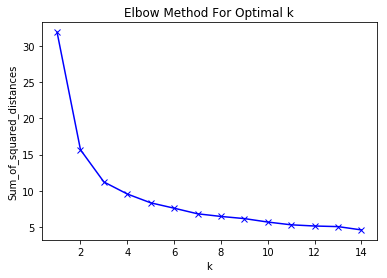

In [16]:
# Check elbow method to determine whcih are the optimal number of clusters to use
barcelona_onehot_plus_DensityAge_grouped2 = barcelona_onehot_plus_DensityAge_grouped.copy()
del barcelona_onehot_plus_DensityAge_grouped2['Neighborhood_main_field']

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(barcelona_onehot_plus_DensityAge_grouped2)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
    

In [17]:
# Execute K-mean algorithm using 4 clusters
kclusters = 4
barcelona_grouped_clustering = barcelona_onehot_plus_DensityAge_grouped.drop('Neighborhood_main_field', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(barcelona_grouped_clustering)
kmeans.labels_[0:8]

array([2, 2, 2, 2, 0, 0, 1, 0], dtype=int32)

In [18]:
# Insert cluster to the dataframe
bar_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


# Join with venues and latlon_density_age dataframes
barcelona_merged = df_latlon_density_age
barcelona_merged = barcelona_merged.join(bar_neighborhoods_venues_sorted.set_index('NEIGHBORHOOD'), on='NEIGHBORHOOD')

# Drop na values and reset indexs
barcelona_merged.dropna(subset=['Cluster Labels'], axis= 0, inplace= True) 
barcelona_merged.reset_index(drop = True, inplace = True)
barcelona_merged.head()

,NEIGHBORHOOD,POPULATION,RESIDENCIAL_AREA,NET_DENSITY,0-14 years,15-24 years,25- 64 years,65 years and more,DISTRICT,LATITUDE,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,el Raval,47608,49.7,958.8,6146,4867,30926,5669,Ciutat Vella,41.379364,...,Spanish Restaurant,Cocktail Bar,Tapas Restaurant,Bar,Hotel,Restaurant,Mediterranean Restaurant,Plaza,Falafel Restaurant,Burger Joint
1,el Barri Gotic,16062,34.1,470.6,1354,1532,10966,2210,Ciutat Vella,41.382478,...,Tapas Restaurant,Plaza,Ice Cream Shop,Spanish Restaurant,Hotel,Bar,Japanese Restaurant,Dessert Shop,Cocktail Bar,Vegetarian / Vegan Restaurant
2,la Barceloneta,14996,13.5,1107.4,1268,1285,9672,2771,Ciutat Vella,41.379428,...,Mediterranean Restaurant,Tapas Restaurant,Paella Restaurant,Bar,Spanish Restaurant,Beach,Restaurant,Seafood Restaurant,Pizza Place,Burger Joint
3,"Sant Pere, Santa Caterina i la Ribera",22721,32.5,700.1,2221,2065,15175,3260,Ciutat Vella,41.386140,...,Tapas Restaurant,Bar,Cocktail Bar,Wine Bar,Café,Hotel,Dessert Shop,Vegetarian / Vegan Restaurant,Art Museum,Spanish Restaurant
4,el Fort Pienc,32016,33.4,958.6,3703,2781,18727,6805,Eixample,41.397656,...,Restaurant,Spanish Restaurant,Theater,Hotel,Breakfast Spot,Hostel,Mediterranean Restaurant,Chinese Restaurant,Bakery,Bistro


In [19]:
# Paint Barcelona Map
map_barcelona_clusters = folium.Map(location=[location.latitude, location.longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add Neighborhood markers to map
for lat, lon, poi, cluster in zip(barcelona_merged['LATITUDE'], barcelona_merged['LONGITUDE'], barcelona_merged['NEIGHBORHOOD'], barcelona_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_barcelona_clusters)
    
map_barcelona_clusters

In [20]:
# Prepare dataframe with italian restaurant data
df_italian_rest = barcelona_onehot.join(df_latlon_density_age.set_index('NEIGHBORHOOD'), on='Neighborhood_main_field')[["Neighborhood_main_field", "Pizza Place","Italian Restaurant", "POPULATION"]]
df_italian_rest["Italian_Restaurant"] = df_italian_rest["Italian Restaurant"] + df_italian_rest["Pizza Place"]
df_italian_rest = df_italian_rest[["Neighborhood_main_field", "POPULATION", "Italian_Restaurant"]]
df_italian_rest = df_italian_rest.groupby(['Neighborhood_main_field','POPULATION']).sum().sort_values("Italian_Restaurant", ascending=False).reset_index()
df_italian_rest["Popu/rest"] = df_italian_rest["POPULATION"] // df_italian_rest["Italian_Restaurant"]
df_italian_rest = df_italian_rest.join(bar_neighborhoods_venues_sorted[["NEIGHBORHOOD","Cluster Labels"]].set_index('NEIGHBORHOOD'), on='Neighborhood_main_field')
df_italian_rest

,Neighborhood_main_field,POPULATION,Italian_Restaurant,Popu/rest,Cluster Labels
0,el Poblenou,33843,9,3760.0,1
1,la Sagrada Familia,51539,8,6442.0,3
2,les Tres Torres,16667,7,2381.0,0
3,el Poble Sec,40228,7,5746.0,1
4,Sants - Badal,23987,7,3426.0,1
5,la Bordeta,18530,6,3088.0,0
6,Sants,41127,6,6854.0,3
7,la Vila de Gracia,50662,6,8443.0,3
8,el Camp de l'Arpa del Clot,38168,6,6361.0,1
9,Sant Antoni,38345,6,6390.0,1


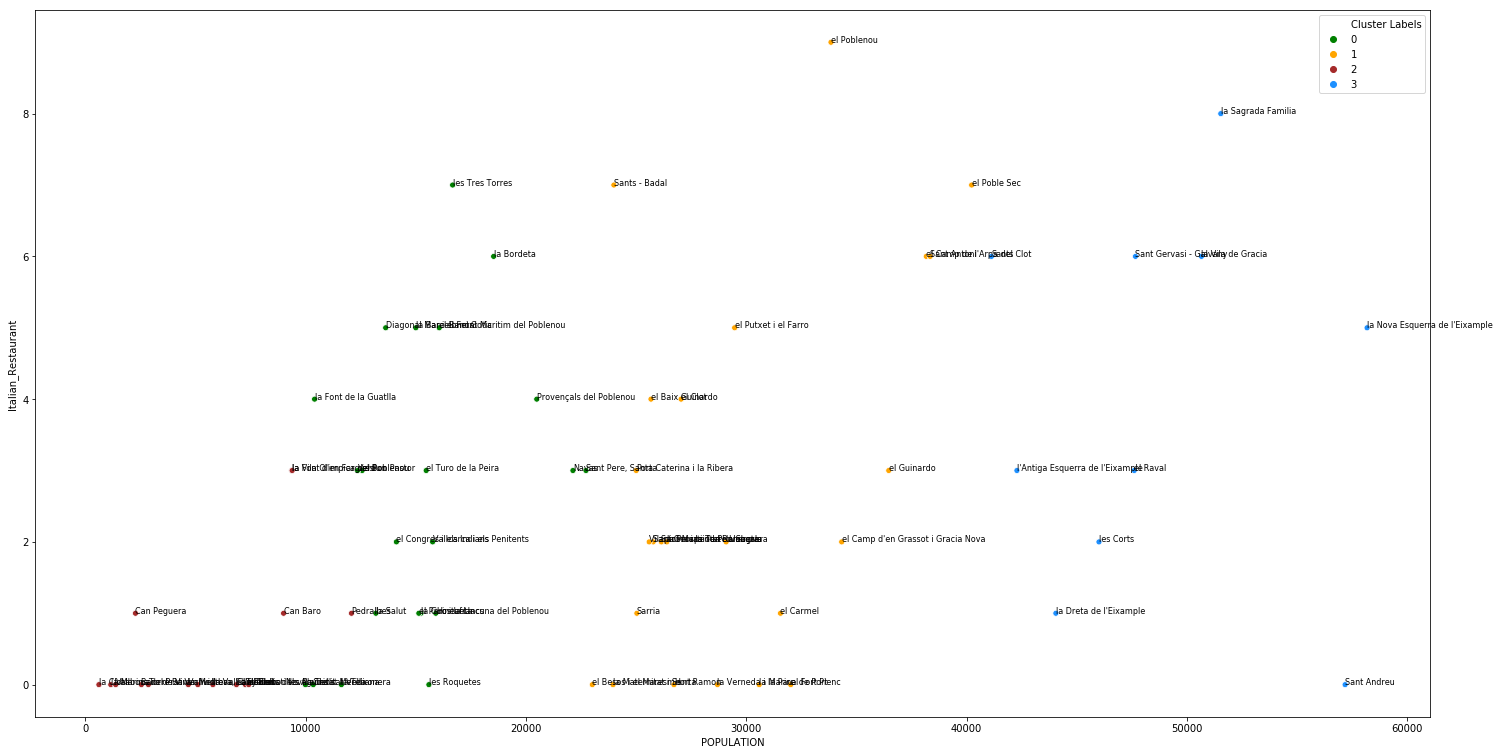

In [21]:
# Create a scatterplot showing population of neighborhood and the number of italian restaurants of each one
plt.figure(figsize=(25, 13)) 
ax =sns.scatterplot(x="POPULATION", y="Italian_Restaurant",
              hue="Cluster Labels",palette=['green','orange','brown','dodgerblue'],
              data=df_italian_rest);

for line in range(0,df_italian_rest.shape[0]):
     ax.text(df_italian_rest.POPULATION[line], df_italian_rest.Italian_Restaurant[line], df_italian_rest.Neighborhood_main_field[line], size=8, color='black')

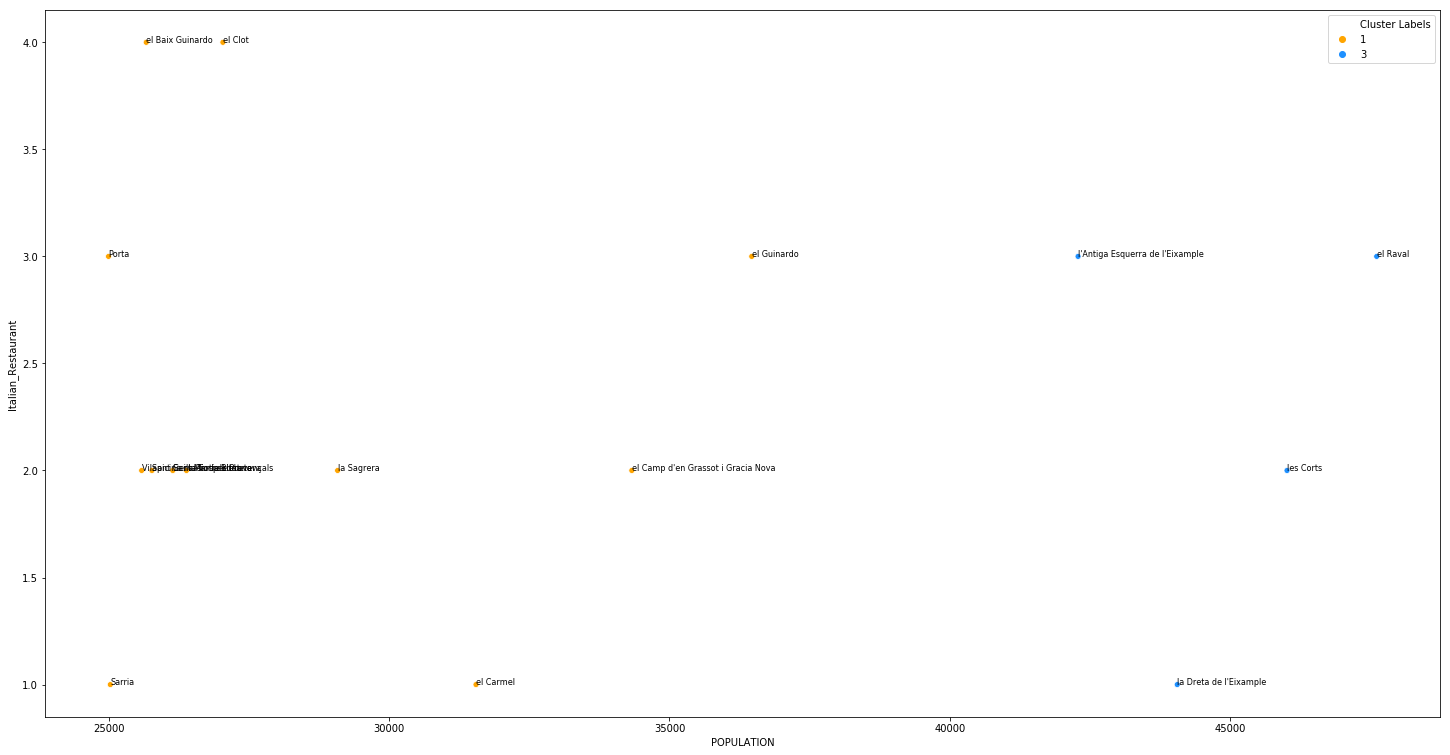

In [22]:
# Create a new selection of the dataframe keeping clusters with higher population and deleting neighborhoods with more than 4 resurants or less than 1.
cluster_selection = df_italian_rest['Cluster Labels'].isin([1, 3])
locals_selection = df_italian_rest['Italian_Restaurant'].isin([1, 2, 3, 4])
df_italian_rest_clustered = df_italian_rest[cluster_selection & locals_selection]
df_italian_rest_clustered.reset_index(drop = True, inplace = True)
df_italian_rest_clustered

plt.figure(figsize=(25, 13)) 
ax =sns.scatterplot(x="POPULATION", y="Italian_Restaurant",
              hue="Cluster Labels",palette=['orange','dodgerblue'],
              data=df_italian_rest_clustered);

for line in range(0,df_italian_rest_clustered.shape[0]):
     ax.text(df_italian_rest_clustered.POPULATION[line], df_italian_rest_clustered.Italian_Restaurant[line], df_italian_rest_clustered.Neighborhood_main_field[line], size=8, color='black')

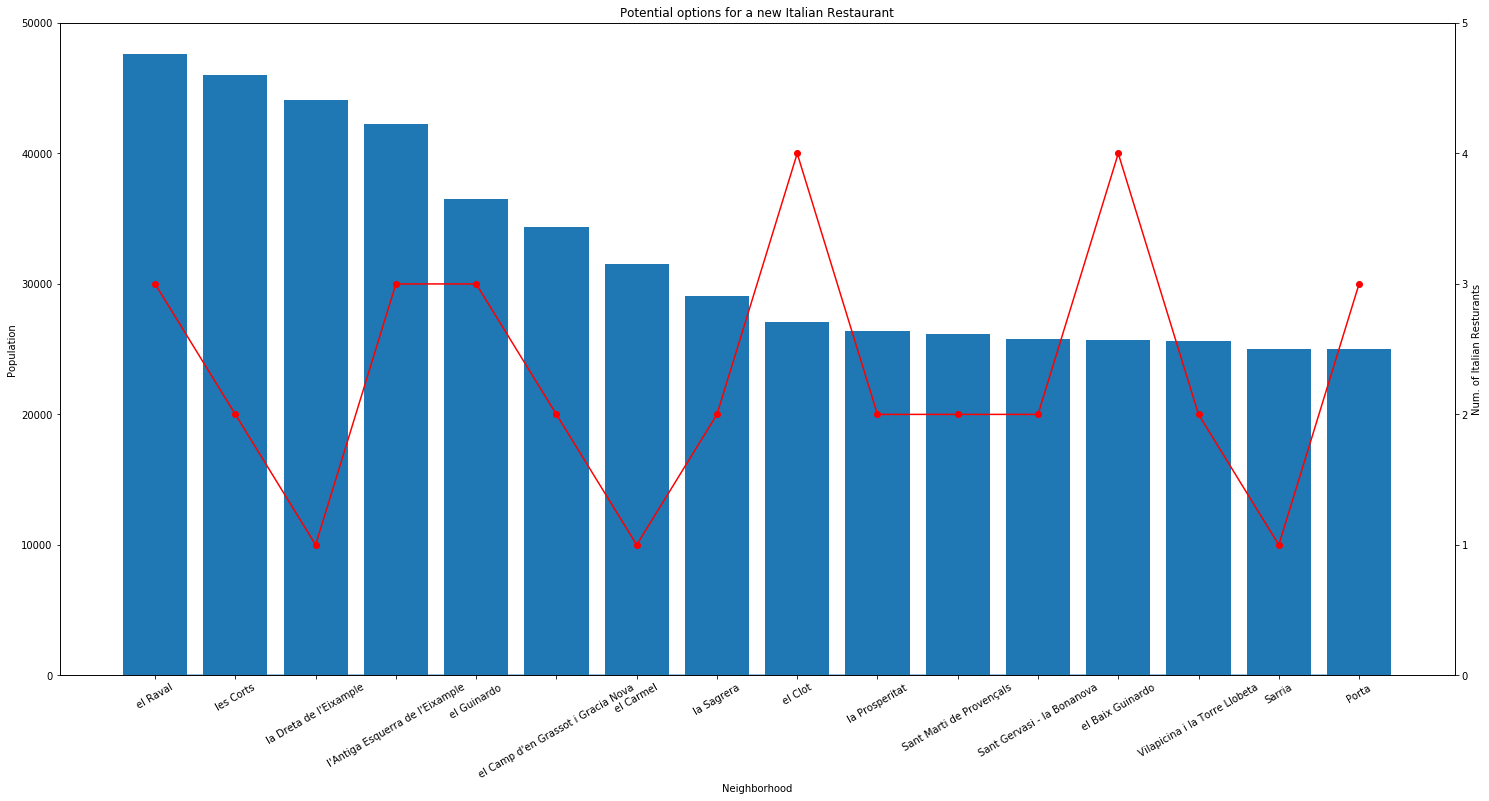

In [23]:
# Paint hte new information combining bar plot and line plot
df_italian_rest_clustered = df_italian_rest_clustered.sort_values('POPULATION',ascending=False)

plt.figure(figsize=(25, 12)) 
plt.bar(df_italian_rest_clustered['Neighborhood_main_field'],df_italian_rest_clustered['POPULATION'])
plt.plot(df_italian_rest_clustered['Neighborhood_main_field'],df_italian_rest_clustered['Italian_Restaurant'])
plt.xlabel('Neighborhood', fontsize=10)
plt.ylabel('Population', fontsize=10)
plt.xticks(rotation=30)
plt.title('Potential options for a new Italian Restaurant')


axes2 = plt.twinx()
axes2.plot(df_italian_rest_clustered['Neighborhood_main_field'],df_italian_rest_clustered['Italian_Restaurant'], color='red', label='Sine',  marker='o')
axes2.set_ylim(0, 5)
axes2.set_ylabel('Num. of Italian Resturants')
plt.show()

In [24]:
# Create a new dataframe counting the number of parks in each neighborhood and putting together with the Population Density
df_parks = barcelona_onehot.join(df_latlon_density_age.set_index('NEIGHBORHOOD'), on='Neighborhood_main_field')[["Neighborhood_main_field", "Park", "NET_DENSITY"]]
df_parks = df_parks.groupby(['Neighborhood_main_field','NET_DENSITY']).sum().sort_values("Park", ascending=False).reset_index()
df_parks["Net_density/Park"] = df_parks["NET_DENSITY"] // df_parks["Park"]
df_parks = df_parks.join(bar_neighborhoods_venues_sorted[["NEIGHBORHOOD","Cluster Labels"]].set_index('NEIGHBORHOOD'), on='Neighborhood_main_field')
df_parks2 = df_parks.dropna(subset=['Net_density/Park'], axis= 0) 
df_parks2 = df_parks2.sort_values('Net_density/Park',ascending=False)
df_parks2

,Neighborhood_main_field,NET_DENSITY,Park,Net_density/Park,Cluster Labels
38,Provençals del Poblenou,1489.8,1,1489.0,0
24,el Turo de la Peira,1151.5,1,1151.0,0
36,Sant Marti de Provençals,1116.5,1,1116.0,1
26,la Barceloneta,1107.4,1,1107.0,0
33,la Prosperitat,965.3,1,965.0,1
18,el Fort Pienc,958.6,1,958.0,1
37,Sants - Badal,954.5,1,954.0,1
29,la Font de la Guatlla,911.7,1,911.0,0
17,la Nova Esquerra de l'Eixample,891.0,1,891.0,3
39,el Camp d'en Grassot i Gracia Nova,890.9,1,890.0,1


Text(0.5, 1.0, 'Neighborhoods with a higher requirment of a green zone')

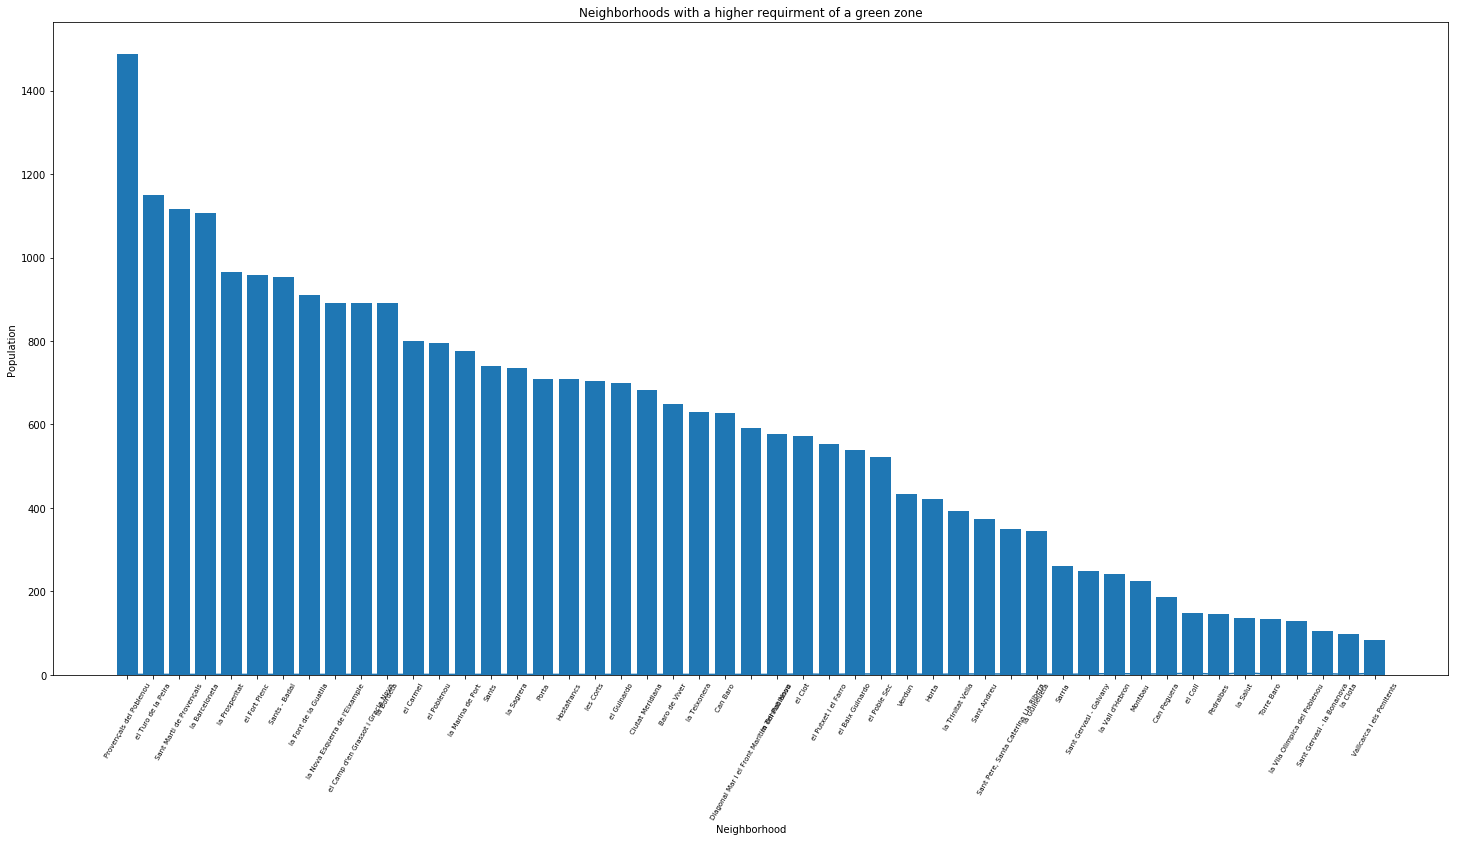

In [25]:
# Show in a bar plot with neighborhoods need more a new green zone
plt.figure(figsize=(25, 12)) 
plt.bar(df_parks2['Neighborhood_main_field'],df_parks2['Net_density/Park'])
plt.plot(df_parks2['Neighborhood_main_field'],df_parks2['Park'])
plt.xlabel('Neighborhood', fontsize=10)
plt.ylabel('Population', fontsize=10)
plt.xticks(fontsize=7, rotation=60)
plt.title('Neighborhoods with a higher requirment of a green zone')

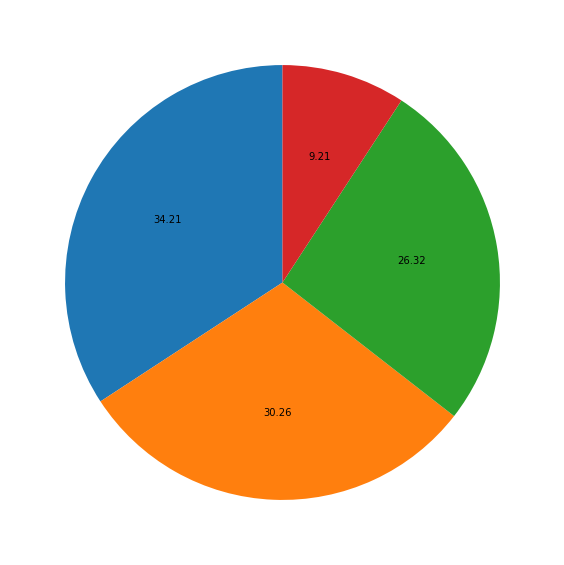

In [30]:
# Show the relationship between park requirment and cluster model
df_parks_cluster = df_parks[["Park", "Cluster Labels"]].groupby(['Cluster Labels']).sum().sort_values("Park", ascending=False).reset_index()

figureObject, axesObject = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))

plt.pie(df_parks_cluster["Park"],autopct='%1.2f', startangle=90)


plt.show()

In [31]:
# Create a new dataframe counting the number of gyms in each neighborhood and comparing with the potential age public.
df_gym = barcelona_onehot.join(df_latlon_density_age.set_index('NEIGHBORHOOD'), on='Neighborhood_main_field')[["Neighborhood_main_field", "Gym", "15-24 years", "25- 64 years"]]
df_gym = df_gym.groupby(['Neighborhood_main_field','15-24 years', '25- 64 years']).sum().sort_values("Gym", ascending=False).reset_index()

df_gym["gym_population/gym"] = (df_gym["15-24 years"] + df_gym["25- 64 years"]) // df_gym["Gym"]
df_gym = df_gym.join(bar_neighborhoods_venues_sorted[["NEIGHBORHOOD","Cluster Labels"]].set_index('NEIGHBORHOOD'), on='Neighborhood_main_field')
df_gym2 = df_gym[df_gym['Gym'] > 0]
df_gym2 = df_gym2.sort_values('gym_population/gym',ascending=True)
df_gym2

,Neighborhood_main_field,15-24 years,25- 64 years,Gym,gym_population/gym,Cluster Labels
19,la Clota,53,378,1,431.0,2
4,la Vall d'Hebron,510,3063,2,1786.0,2
3,el Congres i els Indians,1270,7797,2,4533.0,0
10,la Font d'en Fargues,885,4949,1,5834.0,2
15,Can Baro,768,5087,1,5855.0,2
8,la Font de la Guatlla,887,6083,1,6970.0,0
5,el Baix Guinardo,2083,14484,2,8283.0,1
0,la Nova Esquerra de l'Eixample,4868,33736,4,9651.0,3
7,Vallcarca i els Penitents,1326,8632,1,9958.0,0
11,les Tres Torres,2099,8146,1,10245.0,0


Text(0.5, 1.0, 'Where to open a new Gym')

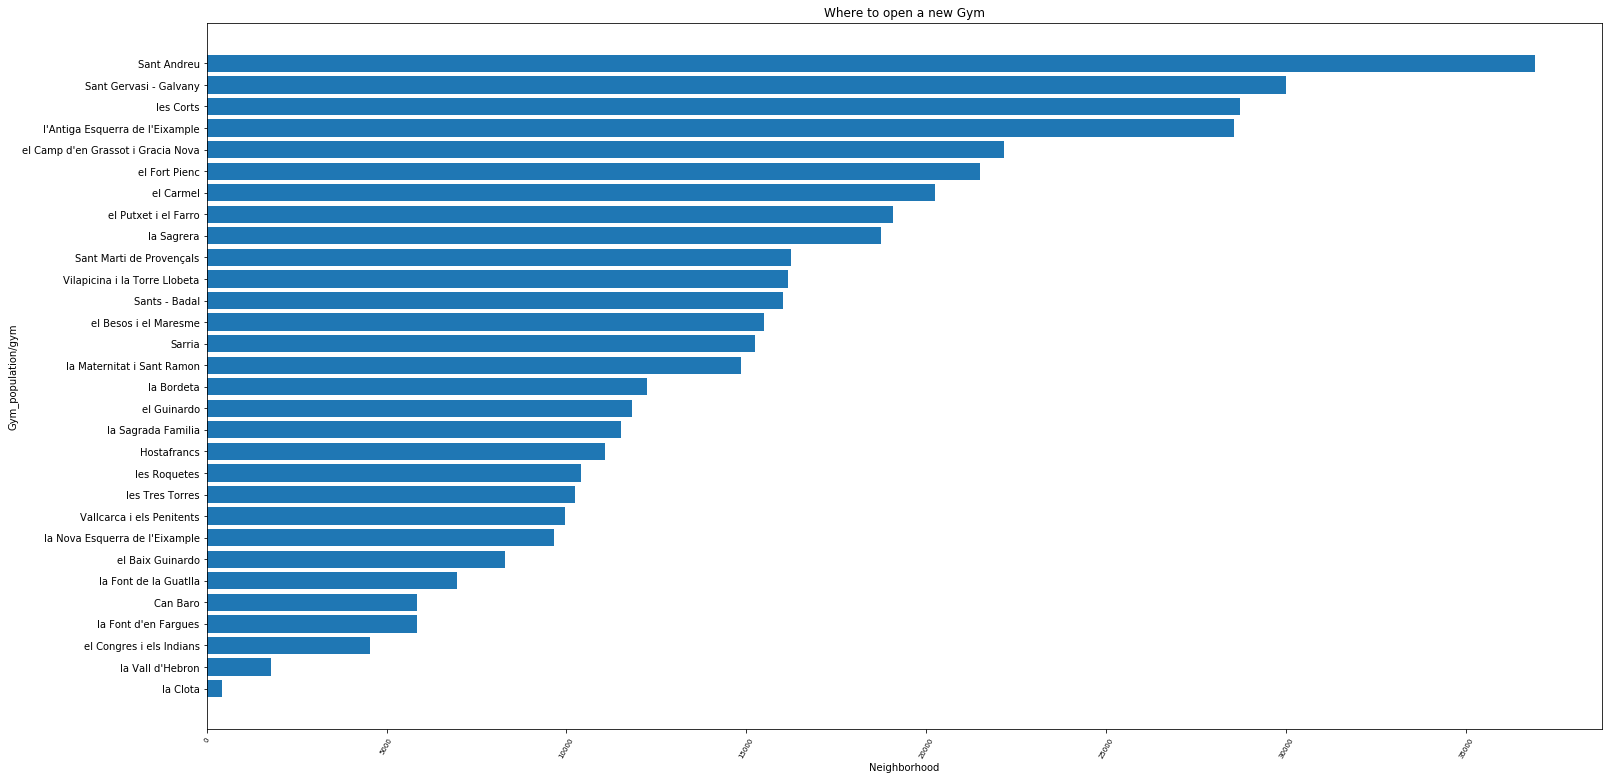

In [32]:
# Show the best options to open a new gym in a bar plot
plt.figure(figsize=(25, 13)) 
plt.barh(df_gym2['Neighborhood_main_field'],df_gym2['gym_population/gym'])
plt.xlabel('Neighborhood', fontsize=10)
plt.ylabel('Gym_population/gym', fontsize=10)
plt.xticks(fontsize=7, rotation=60)
plt.title('Where to open a new Gym')